# BISI CST2101 Project -  Build a model to predict transaction prices
#### Yanhui Gao    -- gao00126

---------------
## Context
---------------
One of our clients is a large real estate investment company. They invest in houses, appartments and condos within a small county in New York state. As a part of their business, they want to try and predict the fair transaction price of a property before it's sold.

Current solution: The company currently uses a third party appraisal service. Appraisers are professionals who visit a property and estimate a fair price using their expertise or their own sets of metrics and checklists. Unfortunately, the skill levels of appraisers can vary greatly. The company compared the appraiser prices to actual transaction prices and they found that the estimates given by the inexperienced appraisers were off by $70,000 on average.

Your role: The company has hired us to find a data driven approach to value properties. They currently have a dataset for transaction prices for previously sold properties on the market and our goal is to build a real estate pricing model using that dataset.

---------------
## Objective
---------------

Here, we are build a model to predict transaction prices with an average error of under $70,000.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

#### Target variable  
    • 'price' - Transaction price in USD  

#### Public records of the property  
    • ‘year_sold’ - Year the transaction took place  
    • 'property_tax' - Monthly property tax  
    • 'insurance' - Cost of monthly homeowner's insurance  

#### Property characteristics  
    • 'beds' - Number of bedrooms  
    • 'baths' - Number of bathrooms  
    • 'sqft' - Total floor area in squared feet  
    • 'year_built' - Year property was built  
    • 'lot_size' - Total outside area in squared feet  
    • 'basement' - Does the property have a basement?  

#### Convenience scores  
    • 'restaurants' - Number of restaurants within 1 mile  
    • 'groceries' - Number of grocery stores within 1 mile  
    • 'nightlife' - Number of nightlife venues within 1 mile  
    • 'cafes' - Number of cafes within 1 mile  
    • 'shopping' - Number of stores within 1 mile  
    • 'entertainment' - Number of entertainment venues within 1 mile  
    • 'sports' - Number of gyms, yoga studios, and sports venues within 1 mile  
    • ‘num_schools ‘- Number of public schools within district  

#### Neighborhood demographics  
    • 'median_age' - Median age of people in the neighborhood  
    • 'married' - Percent of people in the neighborhood who are married  
    • 'college_grad' - Percent of people in the neighborhood who graduated college  

---------------
### This project will be carried out in 4 stages
---------------

    1. Exploratory Data Analysis: Data understanding and generating insights
    2. Data Cleaning & Data Preparation: Preparing data for Modelling
    3. Data Modelling: Experimenting with different algorithms
    4. Model Evaluation: Evaluate using performance metrics

## 1. Exploratory Data Analysis 

Our goal with this is to **"get to know"** the data. We will probably need to do ad-hoc data exploration later. 

#### Import the libraries we need.

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for Data Manipulation
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

#### Import the dataset

In [2]:
# Load real estate data from the CSV file
df = pd.read_csv('real_estate.csv')

#### Display the dataset basic information

In [9]:
# print the dataset
df.head()

price  year_sold  property_tax  insurance  beds  baths  sqft  year_built  \
0  295850       2013           234         81     1      1   584        2013   
1  216500       2006           169         51     1      1   612        1965   
2  279900       2012           216         74     1      1   615        1963   
3  379900       2005           265         92     1      1   618        2000   
4  340000       2002            88         30     1      1   634        1992   

   lot_size  basement  restaurants  groceries  nightlife  cafes  shopping  \
0         0       NaN          107          9         30     19        89   
1         0       1.0          105         15          6     13        87   
2         0       NaN          183         13         31     30       101   
3     33541       NaN          198          9         38     25       127   
4         0       NaN          149          7         22     20        83   

   entertainment  sports  median_age  married  college_grad  num_schools  \
0              6      58          33       65            84            3   
1              2      14          39       73            69            3   
2             10      62          28       15            86            3   
3             11      83          36       25            91            3   
4             10      73          37       20            75            3   

                   property_type exterior_walls                 roof  
0  Apartment / Condo / Townhouse    Wood Siding                  NaN  
1  Apartment / Condo / Townhouse          Brick  Composition Shingle  
2  Apartment / Condo / Townhouse    Wood Siding                  NaN  
3  Apartment / Condo / Townhouse    Wood Siding                  NaN  
4  Apartment / Condo / Townhouse          Brick                  NaN

#### Check if corrupted data hiding at the very end 

In [4]:
# Display the last 5 rows of data.
df.tail()

price  year_sold  property_tax  insurance  beds  baths  sqft  \
1878  385000       2002          1250        381     5      6  6381   
1879  690000       2015          1553        473     5      6  6501   
1880  600000       1999           942        287     5      6  7064   
1881  759900       2009           803        245     5      6  7500   
1882  735000       2015          1459        444     5      6  7515   

      year_built  lot_size  basement  ...  shopping  entertainment  sports  \
1878        2004    224334       1.0  ...         3              0       1   
1879        1956     23086       1.0  ...        41              3      11   
1880        1995    217800       1.0  ...         8              2       2   
1881        2006      8886       1.0  ...         5              1       6   
1882        1958     10497       1.0  ...         2              2       5   

      median_age  married  college_grad  num_schools  property_type  \
1878          46       76            87            3  Single-Family   
1879          42       73            61            3  Single-Family   
1880          43       87            66            1  Single-Family   
1881          43       61            51            2  Single-Family   
1882          37       80            86            3  Single-Family   

           exterior_walls                 roof  
1878               Stucco  Composition Shingle  
1879                Brick  Composition Shingle  
1880                Metal  Composition Shingle  
1881  Siding (Alum/Vinyl)              Asphalt  
1882                Brick  Composition Shingle  

[5 rows x 24 columns]

#### Look at the shape, or the dimensions of the dataset

In [5]:
# Dataframe dimensions
df.shape

(1883, 24)

#### Display the data types

In [10]:
# Print column datatypes using .dtypes
df.dtypes

price               int64
year_sold           int64
property_tax        int64
insurance           int64
beds                int64
baths               int64
sqft                int64
year_built          int64
lot_size            int64
basement          float64
restaurants         int64
groceries           int64
nightlife           int64
cafes               int64
shopping            int64
entertainment       int64
sports              int64
median_age          int64
married             int64
college_grad        int64
num_schools         int64
property_type      object
exterior_walls     object
roof               object
dtype: object

## Distributions

#### Seaborn comes with a .pairplot() function that plots the distributions of all of the numeric features

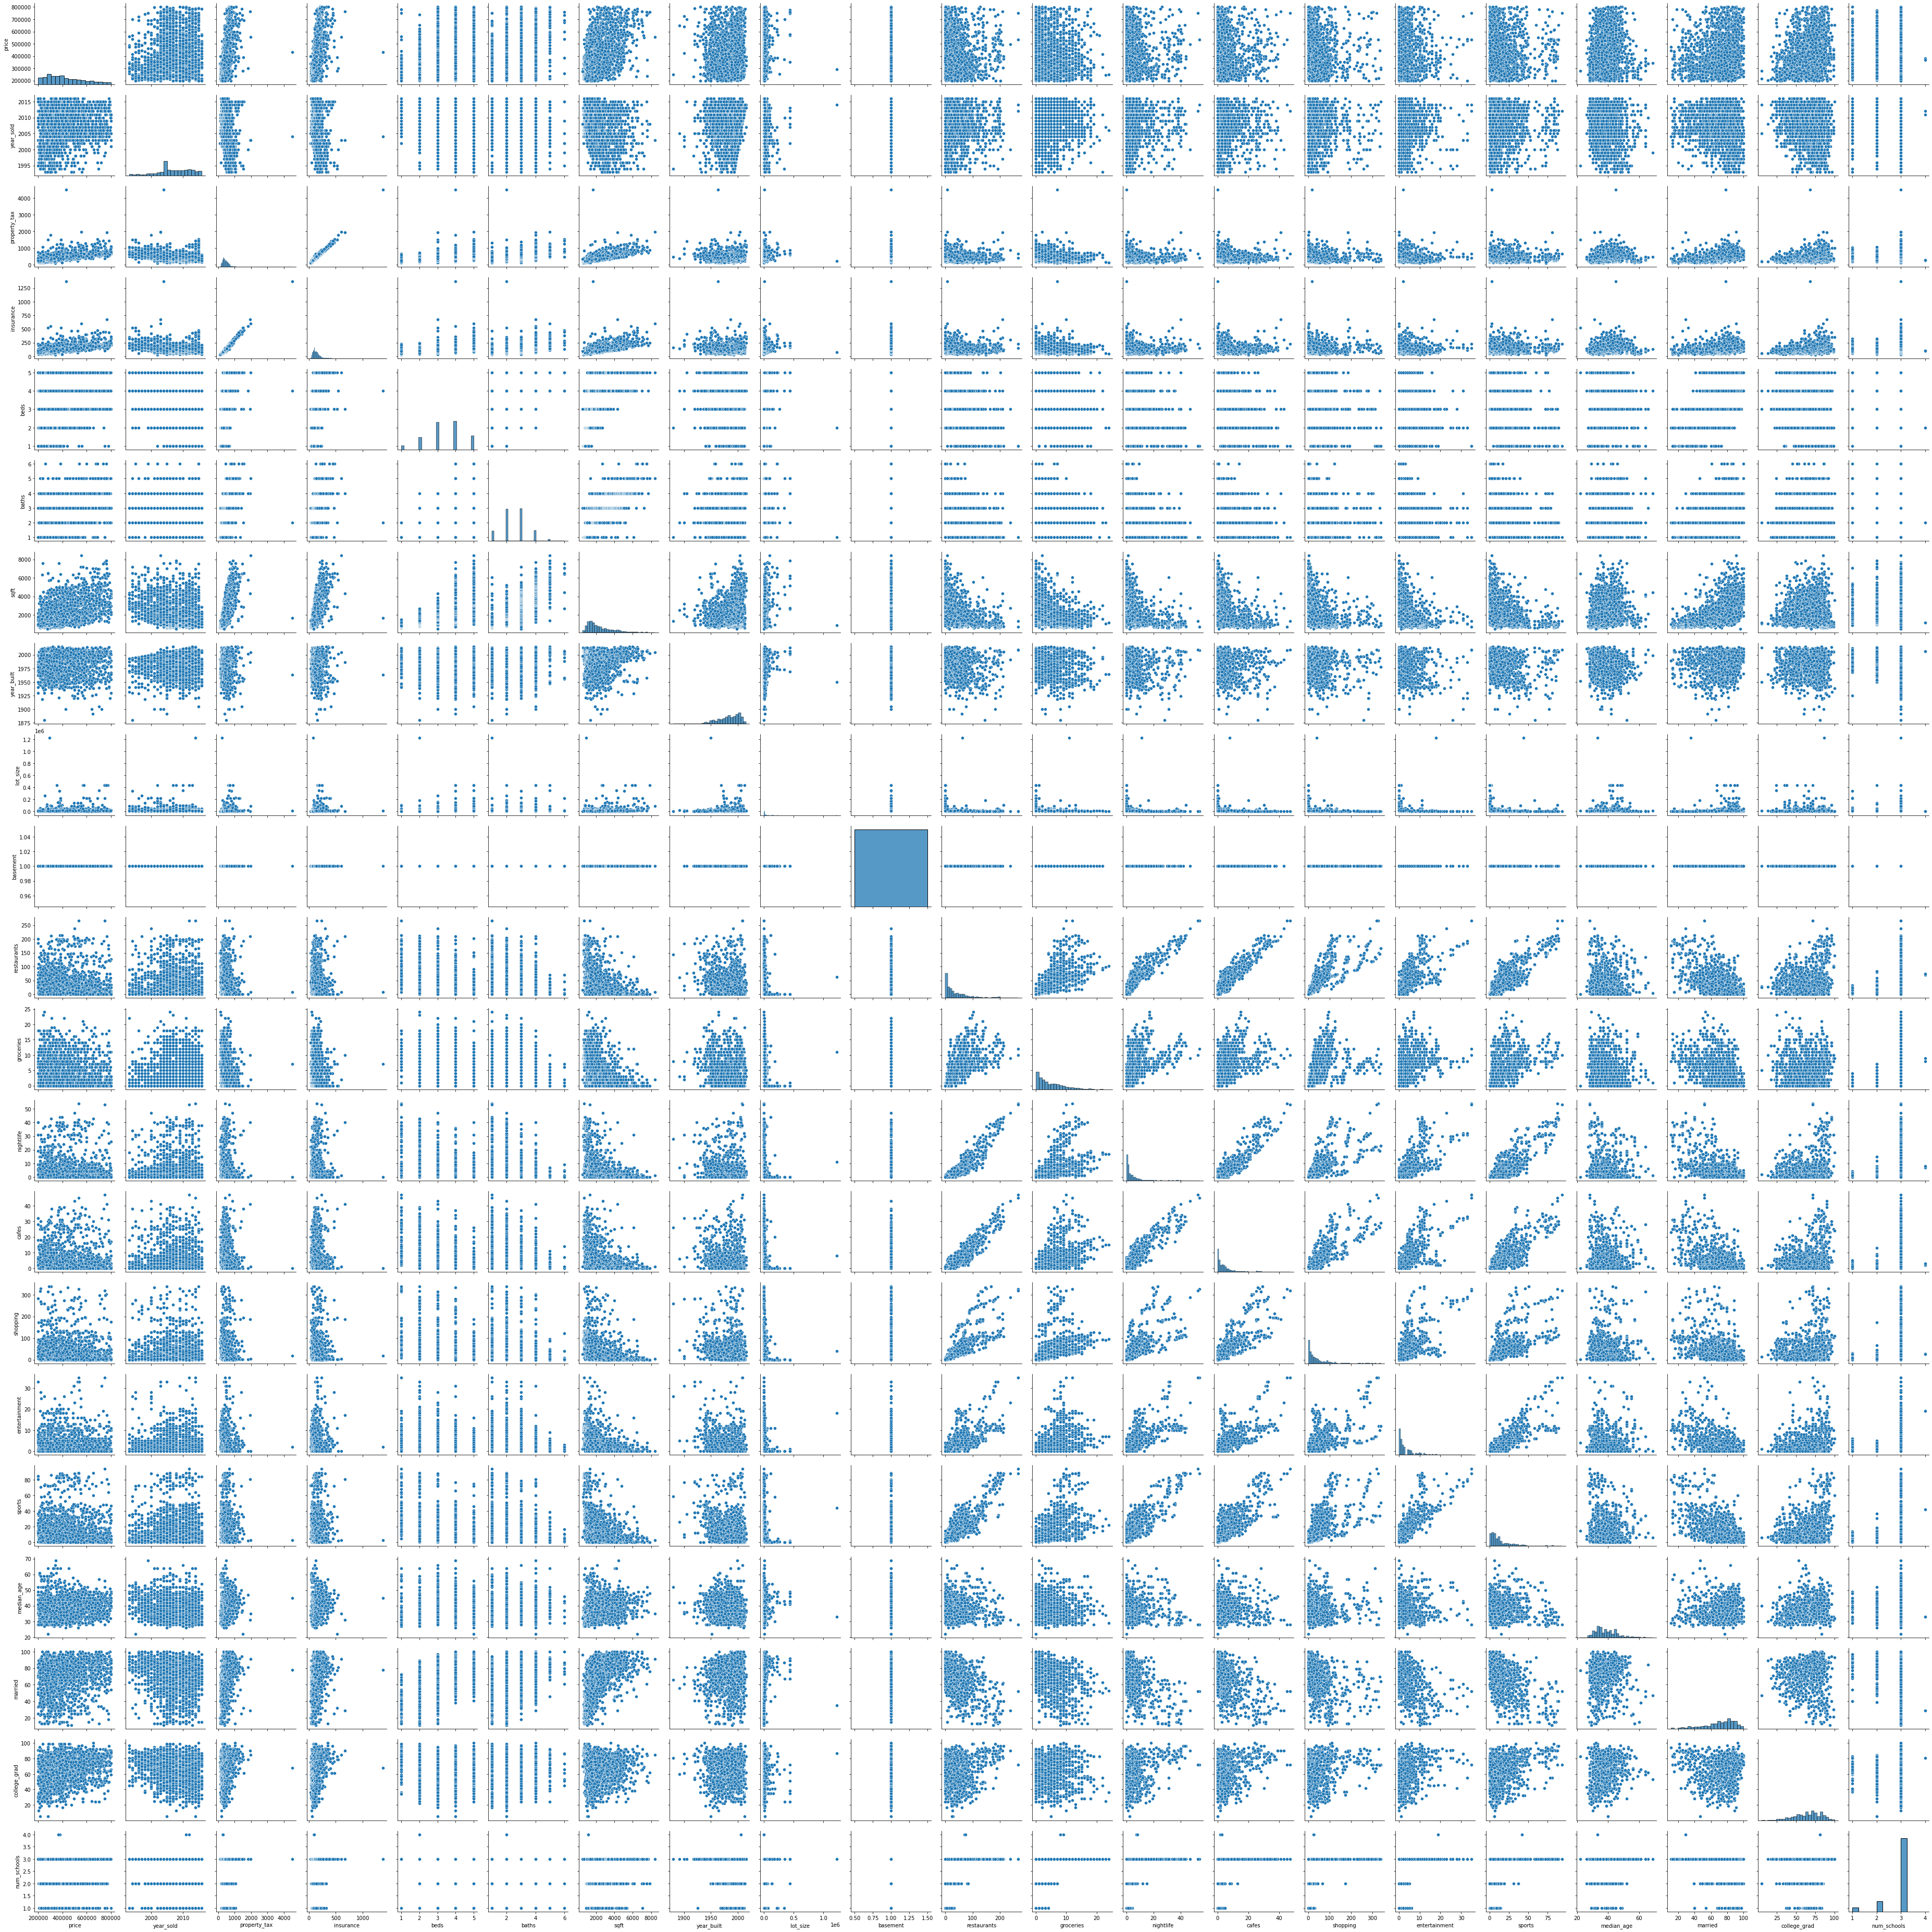

In [12]:
# Plot histogram grid
sns.pairplot(df)

# Clear the text "residue"
plt.show()

#### Display summary statistics for the numerical features

In [13]:
# Summarize numerical features
df.describe()

price    year_sold  property_tax    insurance         beds  \
count    1883.000000  1883.000000   1883.000000  1883.000000  1883.000000   
mean   422839.807754  2007.111524    466.777483   140.454063     3.420605   
std    151462.593276     5.196898    231.656645    72.929765     1.068554   
min    200000.000000  1993.000000     88.000000    30.000000     1.000000   
25%    300000.000000  2004.000000    320.000000    94.000000     3.000000   
50%    392000.000000  2007.000000    426.000000   125.000000     3.000000   
75%    525000.000000  2011.000000    569.000000   169.000000     4.000000   
max    800000.000000  2016.000000   4508.000000  1374.000000     5.000000   

             baths         sqft   year_built      lot_size  basement  \
count  1883.000000  1883.000000  1883.000000  1.883000e+03    1657.0   
mean      2.579926  2329.398832  1982.963887  1.339262e+04       1.0   
std       0.945576  1336.991858    20.295945  4.494930e+04       0.0   
min       1.000000   500.000000  1880.000000  0.000000e+00       1.0   
25%       2.000000  1345.000000  1970.000000  1.542000e+03       1.0   
50%       3.000000  1907.000000  1986.000000  6.098000e+03       1.0   
75%       3.000000  3005.000000  2000.000000  1.176100e+04       1.0   
max       6.000000  8450.000000  2015.000000  1.220551e+06       1.0   

       restaurants    groceries    nightlife        cafes     shopping  \
count  1883.000000  1883.000000  1883.000000  1883.000000  1883.000000   
mean     40.210303     4.505045     5.074881     5.325013    40.802443   
std      46.867012     4.491029     8.464668     7.539309    53.539296   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.000000     1.000000     0.000000     0.000000     6.000000   
50%      23.000000     3.000000     2.000000     3.000000    22.000000   
75%      58.000000     7.000000     6.000000     6.000000    51.000000   
max     266.000000    24.000000    54.000000    47.000000   340.000000   

       entertainment       sports   median_age      married  college_grad  \
count    1883.000000  1883.000000  1883.000000  1883.000000   1883.000000   
mean        3.394052    15.835369    38.601168    69.091875     65.085502   
std         4.699787    17.667717     6.634110    19.659767     16.953165   
min         0.000000     0.000000    22.000000    11.000000      5.000000   
25%         0.000000     4.000000    33.000000    58.000000     54.000000   
50%         2.000000    10.000000    38.000000    73.000000     66.000000   
75%         5.000000    21.000000    43.000000    84.000000     78.000000   
max        35.000000    94.000000    69.000000   100.000000    100.000000   

       num_schools  
count  1883.000000  
mean      2.793415  
std       0.505358  
min       1.000000  
25%       3.000000  
50%       3.000000  
75%       3.000000  
max       4.000000

#### Look at the distributions of categorical features

In [14]:
# Summarize categorical features
df.describe(include=['object'])

property_type exterior_walls                 roof
count            1883           1660                 1529
unique              2             16                   16
top     Single-Family          Brick  Composition Shingle
freq             1080            687                 1179

####  Plot bar plots of each of the categorical features

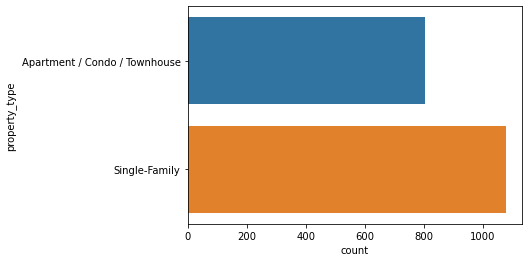

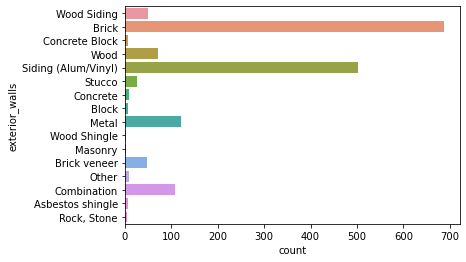

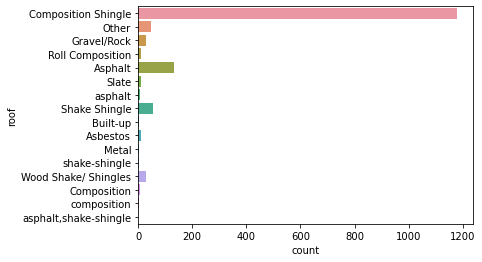

In [15]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

#### The relationship between categorical features and numeric features

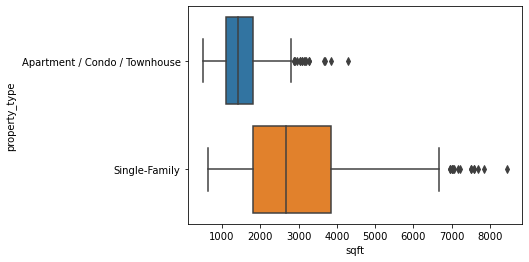

In [19]:
# Plot a box plot of sqft by property_type using seaborn
sns.boxplot(y='property_type', x='sqft', data=df)
plt.show()

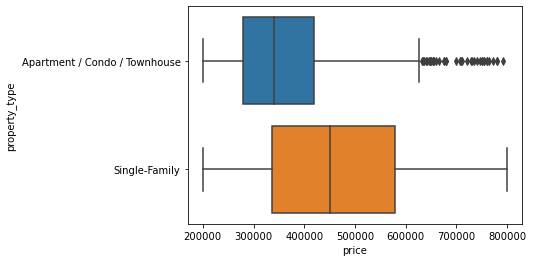

In [20]:
# Plot a box plot of price by property_type using seaborn
sns.boxplot(y='property_type', x='price', data=df)
plt.show()

#### Calculating correlation

In [22]:
# Calculate correlations between numeric features
matrix = df.corr()
matrix

price  year_sold  property_tax  insurance      beds  \
price          1.000000   0.108782      0.535148   0.532947  0.384046   
year_sold      0.108782   1.000000     -0.257703  -0.254706 -0.174081   
property_tax   0.535148  -0.257703      1.000000   0.984724  0.547643   
insurance      0.532947  -0.254706      0.984724   1.000000  0.485776   
beds           0.384046  -0.174081      0.547643   0.485776  1.000000   
baths          0.389375  -0.132110      0.525776   0.475430  0.644572   
sqft           0.469573  -0.236190      0.660264   0.594049  0.691039   
year_built     0.033138  -0.043301     -0.046504  -0.109521 -0.011844   
lot_size       0.130558  -0.048207      0.165800   0.146579  0.164399   
basement            NaN        NaN           NaN        NaN       NaN   
restaurants   -0.038027   0.044739     -0.100821  -0.019925 -0.495834   
groceries     -0.094314   0.115674     -0.159506  -0.093974 -0.421412   
nightlife      0.009361   0.027495     -0.054386   0.024551 -0.440844   
cafes         -0.001398   0.013558     -0.044410   0.036502 -0.464289   
shopping      -0.038246  -0.000324     -0.040556   0.018846 -0.388670   
entertainment -0.021076   0.034356     -0.066346   0.015380 -0.442168   
sports        -0.001165   0.028759     -0.057646   0.030911 -0.486957   
median_age     0.126335  -0.118490      0.215435   0.232503  0.133711   
married        0.200494  -0.134787      0.305330   0.233701  0.643240   
college_grad   0.268577  -0.189932      0.287933   0.326057 -0.082354   
num_schools   -0.014380   0.007361      0.037342   0.056985 -0.124359   

                  baths      sqft  year_built  lot_size  basement  \
price          0.389375  0.469573    0.033138  0.130558       NaN   
year_sold     -0.132110 -0.236190   -0.043301 -0.048207       NaN   
property_tax   0.525776  0.660264   -0.046504  0.165800       NaN   
insurance      0.475430  0.594049   -0.109521  0.146579       NaN   
beds           0.644572  0.691039   -0.011844  0.164399       NaN   
baths          1.000000  0.682060    0.206141  0.132976       NaN   
sqft           0.682060  1.000000    0.254589  0.246016       NaN   
year_built     0.206141  0.254589    1.000000  0.000068       NaN   
lot_size       0.132976  0.246016    0.000068  1.000000       NaN   
basement            NaN       NaN         NaN       NaN       NaN   
restaurants   -0.350210 -0.353759   -0.106948 -0.113887       NaN   
groceries     -0.340024 -0.371167   -0.222443 -0.118574       NaN   
nightlife     -0.306686 -0.281540   -0.080006 -0.072224       NaN   
cafes         -0.316836 -0.300969   -0.102209 -0.098182       NaN   
shopping      -0.259603 -0.275586   -0.121684 -0.116560       NaN   
entertainment -0.305885 -0.293402   -0.195141 -0.067189       NaN   
sports        -0.329736 -0.332663   -0.134919 -0.092668       NaN   
median_age     0.095844  0.109811   -0.237152  0.099140       NaN   
married        0.442225  0.480167    0.038208  0.122028       NaN   
college_grad   0.016097  0.065343   -0.014204 -0.030725       NaN   
num_schools   -0.088299 -0.102032   -0.188106 -0.031535       NaN   

               restaurants  groceries  nightlife     cafes  shopping  \
price            -0.038027  -0.094314   0.009361 -0.001398 -0.038246   
year_sold         0.044739   0.115674   0.027495  0.013558 -0.000324   
property_tax     -0.100821  -0.159506  -0.054386 -0.044410 -0.040556   
insurance        -0.019925  -0.093974   0.024551  0.036502  0.018846   
beds             -0.495834  -0.421412  -0.440844 -0.464289 -0.388670   
baths            -0.350210  -0.340024  -0.306686 -0.316836 -0.259603   
sqft             -0.353759  -0.371167  -0.281540 -0.300969 -0.275586   
year_built       -0.106948  -0.222443  -0.080006 -0.102209 -0.121684   
lot_size         -0.113887  -0.118574  -0.072224 -0.098182 -0.116560   
basement               NaN        NaN        NaN       NaN       NaN   
restaurants       1.000000   0.701462   0.926675  0.937616  0.818815   
groceries         0.701462  

#### Visualize the correlation grid 

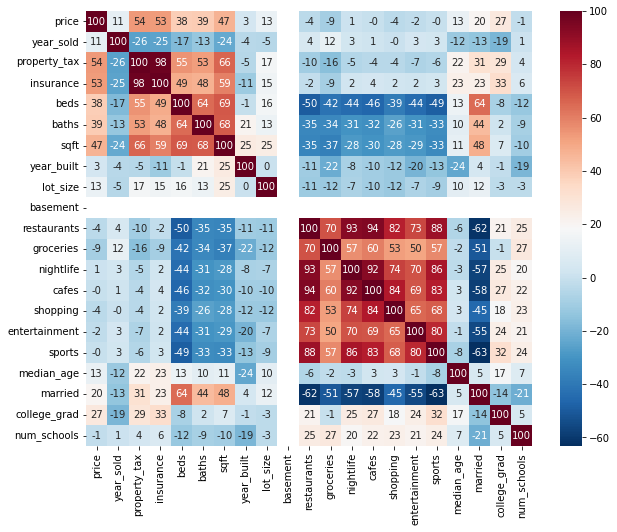

In [25]:
# Make the figsize 10 x 8,so that the plot is a bit larger 
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
sns.heatmap(matrix * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f')

plt.show()

## 2. Data Cleaning

#### Drop unwanted observations

In [26]:
# check the shape of the data before
print(df.shape)

# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(1883, 24)
(1883, 24)


#### Fix structural errors

In [27]:
# Display unique values of 'basement'
print(df.basement.unique())

[nan  1.]


In [29]:
# Replace missing basement values to 0, inplace=True updates the values in the original DataFrame.
df.basement.fillna(0, inplace=True)

# Display unique values of 'basement'
print(df.basement.unique())

[0. 1.]


#### Check for typos or inconsistent capitalization in the categorical features

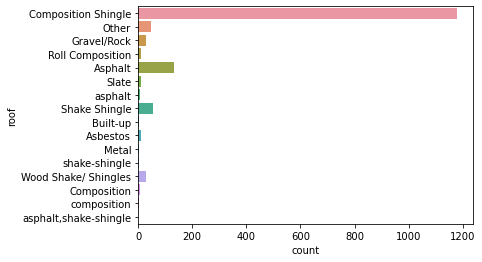

In [31]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

In [32]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle',
                inplace=True)

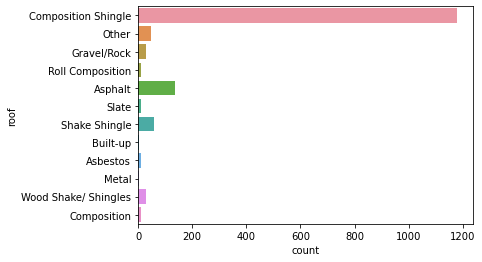

In [33]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

#### check for mislabed classes in the 'exterior_walls' and make any necessary fixes.

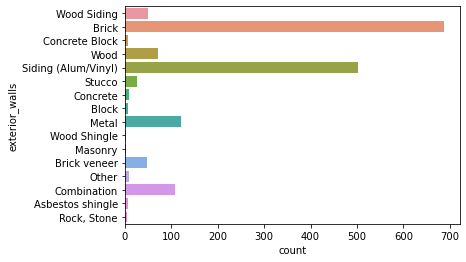

In [35]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

In [36]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

In [37]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

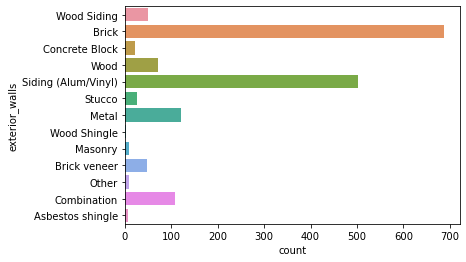

In [38]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

#### Remove "Guilty" Outliers

In [41]:
import warnings
warnings.filterwarnings('ignore')

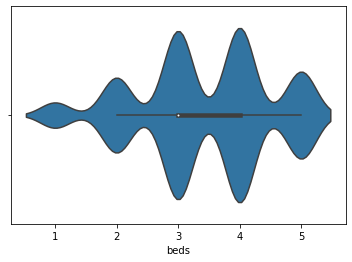

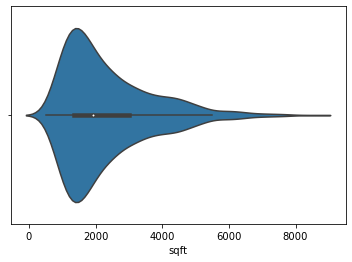

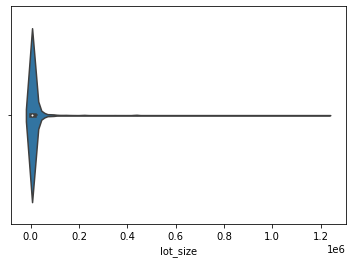

In [43]:
# Violin plot of beds
sns.violinplot(df.beds, data=df)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft, data=df)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size, data=df)
plt.show()

In [44]:
# Print top 5 homes with largest lot_size
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1832     436035
1876     436035
1839     435600
Name: lot_size, dtype: int64

In [45]:
# print the record where lot_size = 1220551
df[df.lot_size == 1220551]

price  year_sold  property_tax  insurance  beds  baths  sqft  \
102  292999       2014           230         79     2      1   875   

     year_built  lot_size  basement  restaurants  groceries  nightlife  cafes  \
102        1950   1220551       0.0           63         11         11      8   

     shopping  entertainment  sports  median_age  married  college_grad  \
102        39             18      44          33       35            87   

     num_schools                  property_type exterior_walls roof  
102            3  Apartment / Condo / Townhouse          Brick  NaN

In [52]:
# All of the other observations are below 500,000 sqft, let's remove outliers
print(df.shape)

(1882, 24)


In [53]:
# Remove records with lot_size > 500,000
df = df[df.lot_size <= 500000]

# check df shape after
print(df.shape)

(1882, 24)


#### Find and count the missing categorical data

In [54]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [55]:
# Fill missing values in exterior_walls with 'Missing'
df['exterior_walls'].fillna('Missing', inplace=True)

In [56]:
# Fill missing values in roof with 'Missing'
df['roof'].fillna('Missing', inplace=True)

In [57]:
# find and count missing values in numerical features
df.select_dtypes(exclude=['object']).isnull().sum()

price            0
year_sold        0
property_tax     0
insurance        0
beds             0
baths            0
sqft             0
year_built       0
lot_size         0
basement         0
restaurants      0
groceries        0
nightlife        0
cafes            0
shopping         0
entertainment    0
sports           0
median_age       0
married          0
college_grad     0
num_schools      0
dtype: int64

#### Save the cleaned dataset

In [59]:
# Save the cleaned dataset
df.to_csv('cleaned_df.csv')

## 3. Feature Engineering

In [61]:
# Load cleaned dataset from the previous lecture
df = pd.read_csv('cleaned_df.csv')
df.head(2)

Unnamed: 0   price  year_sold  property_tax  insurance  beds  baths  sqft  \
0           0  295850       2013           234         81     1      1   584   
1           1  216500       2006           169         51     1      1   612   

   year_built  lot_size  basement  restaurants  groceries  nightlife  cafes  \
0        2013         0       0.0          107          9         30     19   
1        1965         0       1.0          105         15          6     13   

   shopping  entertainment  sports  median_age  married  college_grad  \
0        89              6      58          33       65            84   
1        87              2      14          39       73            69   

   num_schools                  property_type exterior_walls  \
0            3  Apartment / Condo / Townhouse    Wood Siding   
1            3  Apartment / Condo / Townhouse          Brick   

                  roof  
0              Missing  
1  Composition Shingle

#### 2 bedroom and 2 bathroom properties are especially popular for investors. Here create an indicator variable 

In [62]:
# Create indicator variable for properties with 2 beds and 2 baths
df['popular'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [63]:
# Check how many propoerties have 2 baths and 2 beds 
df.popular.value_counts()

0    1704
1     178
Name: popular, dtype: int64

#### Consider the housing market recession around 2008

In [65]:
# Create a new variable recession
df['recession']=((df.year_sold >= 2010) & (df.year_sold <= 2013)).astype(int)

In [66]:
# Check how many propoerties were sold during recession period 
df.recession.value_counts()

0    1386
1     496
Name: recession, dtype: int64

In [67]:
fd = df[['year_sold','recession']]
fd.head(8)

year_sold  recession
0       2013          1
1       2006          0
2       2012          1
3       2005          0
4       2002          0
5       2004          0
6       2011          1
7       2005          0

#### Create a new feature property_age

In [68]:
# Create a property age feature
df['property_age'] = df.year_sold - df.year_built

In [69]:
# Check the stats for the feature property_age
df.describe()

Unnamed: 0          price    year_sold  property_tax    insurance  \
count  1882.000000    1882.000000  1882.000000   1882.000000  1882.000000   
mean    941.445802  422908.798618  2007.107864    466.903294   140.486716   
std     543.519771  151473.251553     5.195851    231.653858    72.935379   
min       0.000000  200000.000000  1993.000000     88.000000    30.000000   
25%     471.250000  300000.000000  2004.000000    320.000000    94.000000   
50%     941.500000  392000.000000  2007.000000    426.000000   125.000000   
75%    1411.750000  525000.000000  2011.000000    569.000000   169.000000   
max    1882.000000  800000.000000  2016.000000   4508.000000  1374.000000   

              beds        baths         sqft   year_built       lot_size  \
count  1882.000000  1882.000000  1882.000000  1882.000000    1882.000000   
mean      3.421360     2.580765  2330.171626  1982.981403   12751.197131   
std       1.068335     0.945125  1336.926475    20.287099   35304.268897   
min       1.000000     1.000000   500.000000  1880.000000       0.000000   
25%       3.000000     2.000000  1346.000000  1970.000000    1542.000000   
50%       3.000000     3.000000  1907.500000  1986.000000    6074.000000   
75%       4.000000     3.000000  3005.000000  2000.000000   11761.000000   
max       5.000000     6.000000  8450.000000  2015.000000  436471.000000   

          basement  restaurants    groceries    nightlife        cafes  \
count  1882.000000  1882.000000  1882.000000  1882.000000  1882.000000   
mean      0.880446    40.198193     4.501594     5.071732     5.323592   
std       0.324525    46.876522     4.489725     8.465815     7.541060   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     7.000000     1.000000     0.000000     0.000000   
50%       1.000000    23.000000     3.000000     2.000000     3.000000   
75%       1.000000    58.000000     7.000000     6.000000     6.000000   
max       1.000000   266.000000    24.000000    54.000000    47.000000   

          shopping  entertainment       sports   median_age      married  \
count  1882.000000    1882.000000  1882.000000  1882.000000  1882.000000   
mean     40.803401       3.386291    15.820404    38.604145    69.109989   
std      53.553509       4.688951    17.660471     6.634615    19.649267   
min       0.000000       0.000000     0.000000    22.000000    11.000000   
25%       6.000000       0.000000     4.000000    33.000000    58.000000   
50%      22.000000       2.000000    10.000000    38.000000    73.000000   
75%      51.000000       5.000000    21.000000    43.000000    84.000000   
max     340.000000      35.000000    94.000000    69.000000   100.000000   

       college_grad  num_schools      popular    recession  property_age  
count   1882.000000  1882.000000  1882.000000  1882.000000   1882.000000  
mean      65.073858     2.793305     0.094580     0.263549     24.126461  
std       16.950137     0.505470     0.292712     0.440675     21.153271  
min        5.000000     1.000000     0.000000     0.000000     -8.000000  
25%       54.000000     3.000000     0.000000     0.000000      6.000000  
50%       66.000000     3.000000     0.000000     0.000000     20.000000  
75%       78.000000     3.000000     0.000000     1.000000     38.000000  
max      100.000000     4.000000     1.000000     1.000000    114.000000

In [70]:
# Check number of observations with 'property_age' < 0
(df.property_age < 0).sum()

19

In [71]:
# Remove observations where property_age is less than 0
print(df.shape)

(1882, 28)


In [72]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print(df.shape)

(1863, 28)


#### Group sparse classes

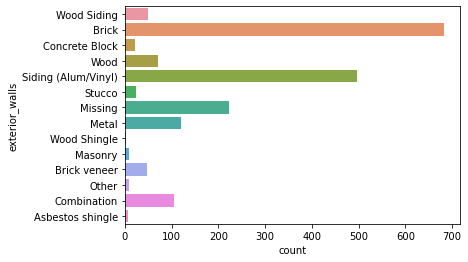

In [73]:
# count plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

In [74]:
# Group sparse classes in 'exterior_wall'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)
df.exterior_walls.replace(['Stucco', 'Asbestos shingle','Concrete Block','Masonry'], 'Other', inplace=True)


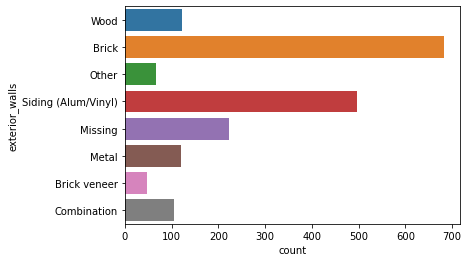

In [75]:
# Count plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

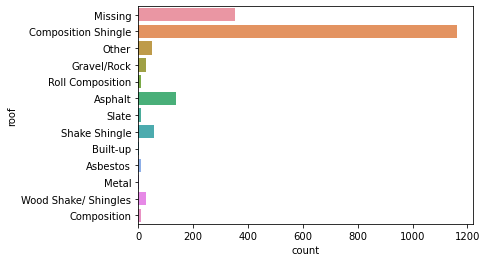

In [76]:
# Count plot for roof
sns.countplot(y='roof', data=df)
plt.show()

In [77]:
# Replace/Group 'Wood Siding' and 'Wood Shingle' to 'Wood'
df.roof.replace(['Gravel/Rock', 'Roll Composition','Slate','Built-up','Asbestos','Metal'], 'Other', inplace=True)
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

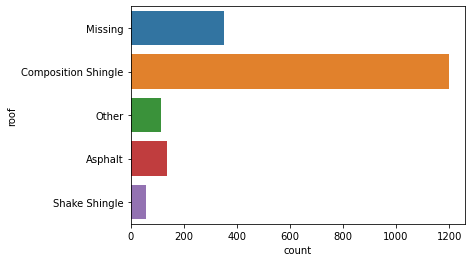

In [78]:
# Count plot for roof
sns.countplot(y='roof', data=df)
plt.show()

####  Create dummy variables for all our categorical features, so Machine Learning algorithms can use them

In [79]:
# Create dummy variables for 'exterior_walls', 'roof', 'property_type'
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])
df.head(2)

Unnamed: 0   price  year_sold  property_tax  insurance  beds  baths  sqft  \
0           0  295850       2013           234         81     1      1   584   
1           1  216500       2006           169         51     1      1   612   

   year_built  lot_size  basement  restaurants  groceries  nightlife  cafes  \
0        2013         0       0.0          107          9         30     19   
1        1965         0       1.0          105         15          6     13   

   shopping  entertainment  sports  median_age  married  college_grad  \
0        89              6      58          33       65            84   
1        87              2      14          39       73            69   

   num_schools  popular  recession  property_age  exterior_walls_Brick  \
0            3        0          1             0                     0   
1            3        0          0            41                     1   

   exterior_walls_Brick veneer  exterior_walls_Combination  \
0                            0                           0   
1                            0                           0   

   exterior_walls_Metal  exterior_walls_Missing  exterior_walls_Other  \
0                     0                       0                     0   
1                     0                       0                     0   

   exterior_walls_Siding (Alum/Vinyl)  exterior_walls_Wood  roof_Asphalt  \
0                                   0                    1             0   
1                                   0                    0             0   

   roof_Composition Shingle  roof_Missing  roof_Other  roof_Shake Shingle  \
0                         0             1           0                   0   
1                         1             0           0                   0   

   property_type_Apartment / Condo / Townhouse  property_type_Single-Family  
0                                            1                            0  
1                                            1                            0

#### Drop redundant features

In [81]:
# Drop 'year_built' and 'year_sold' from the dataset
df.drop(['year_built', 'year_sold'], axis=1, inplace=True)
df.head()

Unnamed: 0   price  property_tax  insurance  beds  baths  sqft  lot_size  \
0           0  295850           234         81     1      1   584         0   
1           1  216500           169         51     1      1   612         0   
2           2  279900           216         74     1      1   615         0   
3           3  379900           265         92     1      1   618     33541   
4           4  340000            88         30     1      1   634         0   

   basement  restaurants  groceries  nightlife  cafes  shopping  \
0       0.0          107          9         30     19        89   
1       1.0          105         15          6     13        87   
2       0.0          183         13         31     30       101   
3       0.0          198          9         38     25       127   
4       0.0          149          7         22     20        83   

   entertainment  sports  median_age  married  college_grad  num_schools  \
0              6      58          33       65            84            3   
1              2      14          39       73            69            3   
2             10      62          28       15            86            3   
3             11      83          36       25            91            3   
4             10      73          37       20            75            3   

   popular  recession  property_age  exterior_walls_Brick  \
0        0          1             0                     0   
1        0          0            41                     1   
2        0          1            49                     0   
3        0          0             5                     0   
4        0          0            10                     1   

   exterior_walls_Brick veneer  exterior_walls_Combination  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   exterior_walls_Metal  exterior_walls_Missing  exterior_walls_Other  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   exterior_walls_Siding (Alum/Vinyl)  exterior_walls_Wood  roof_Asphalt  \
0                                   0                    1             0   
1                                   0                    0             0   
2                                   0                    1             0   
3                                   0                    1             0   
4                                   0                    0             0   

   roof_Composition Shingle  roof_Missing  roof_Other  roof_Shake Shingle  \
0                         0             1           0                   0   
1                         1             0           0                   0   
2                         0             1           0                   0   
3                         0             1           0                   0   
4                         0             1           0                   0   

   property_type_Apartment / Condo / Townhouse  property_type_Single-Family  
0                                            1                            0  
1                                            1                            0  
2                                            1                            0  
3                                            1                            0  
4                                            1                            0

#### Save this dataset and train the model on it.

In [82]:
# Save the data as 'final.csv'
df.to_csv('final.csv', index=None)

## 4. Model Training

In [84]:
# Load the data
df = pd.read_csv('final.csv')
df.head()

Unnamed: 0   price  property_tax  insurance  beds  baths  sqft  lot_size  \
0           0  295850           234         81     1      1   584         0   
1           1  216500           169         51     1      1   612         0   
2           2  279900           216         74     1      1   615         0   
3           3  379900           265         92     1      1   618     33541   
4           4  340000            88         30     1      1   634         0   

   basement  restaurants  groceries  nightlife  cafes  shopping  \
0       0.0          107          9         30     19        89   
1       1.0          105         15          6     13        87   
2       0.0          183         13         31     30       101   
3       0.0          198          9         38     25       127   
4       0.0          149          7         22     20        83   

   entertainment  sports  median_age  married  college_grad  num_schools  \
0              6      58          33       65            84            3   
1              2      14          39       73            69            3   
2             10      62          28       15            86            3   
3             11      83          36       25            91            3   
4             10      73          37       20            75            3   

   popular  recession  property_age  exterior_walls_Brick  \
0        0          1             0                     0   
1        0          0            41                     1   
2        0          1            49                     0   
3        0          0             5                     0   
4        0          0            10                     1   

   exterior_walls_Brick veneer  exterior_walls_Combination  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   

   exterior_walls_Metal  exterior_walls_Missing  exterior_walls_Other  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   exterior_walls_Siding (Alum/Vinyl)  exterior_walls_Wood  roof_Asphalt  \
0                                   0                    1             0   
1                                   0                    0             0   
2                                   0                    1             0   
3                                   0                    1             0   
4                                   0                    0             0   

   roof_Composition Shingle  roof_Missing  roof_Other  roof_Shake Shingle  \
0                         0             1           0                   0   
1                         1             0           0                   0   
2                         0             1           0                   0   
3                         0             1           0                   0   
4                         0             1           0                   0   

   property_type_Apartment / Condo / Townhouse  property_type_Single-Family  
0                                            1                            0  
1                                            1                            0  
2                                            1                            0  
3                                            1                            0  
4                                            1                            0

In [85]:
df.shape

(1863, 38)

### Linear Regression Model

In [86]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [87]:
# seperate input features in x
x = df.drop('price', axis=1)

# store the target variable in y
y = df['price']
y

0       295850
1       216500
2       279900
3       379900
4       340000
         ...  
1858    760000
1859    690000
1860    600000
1861    759900
1862    735000
Name: price, Length: 1863, dtype: int64

#### Train test split

In [89]:
# import module
from sklearn.model_selection import train_test_split

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [90]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1490, 37), (1490,), (373, 37), (373,))

In [91]:
# train the model
lrmodel = LinearRegression().fit(x_train,y_train)

# make preditions on train set
train_pred = lrmodel.predict(x_train)

In [92]:
# evaluate the model, we need mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_pred, y_train)
print('Train error is', train_mae)

Train error is 93140.13884423395


In [93]:
# make predictions om test set
test_pred = lrmodel.predict(x_test)

#evaluate the model
test_mae = mean_absolute_error(test_pred, y_test)
print('Test error is', test_mae)

Test error is 85329.71679239014


#### Our model is not good beacuse we need a model with Mean Absolute Error < $70,000

### Decision Tree Model

In [95]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [96]:
# train the model
dtmodel = DecisionTreeRegressor(max_depth=4, min_samples_split=30).fit(x_train,y_train)

In [97]:
# make prediction on train set
ytrain_pred = dtmodel.predict(x_train)

In [98]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

78500.80434290392

In [99]:
# make predictions using the x_test values
ytest_pred = dtmodel.predict(x_test)

In [100]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

75894.2087322296

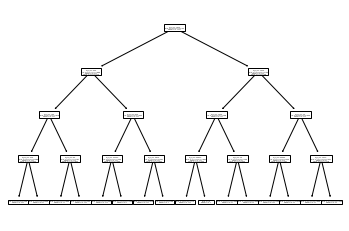

In [101]:
# plot the tree
from sklearn import tree
tree.plot_tree(dtmodel)
plt.show()

#### This model is still not good

### Random Forest Model

In [107]:
# import decision tree model
from sklearn.ensemble import RandomForestRegressor


In [115]:
# train the model
# del model
rfmodel = RandomForestRegressor(n_estimators=200, criterion='mae',random_state=0).fit(x_train,y_train)

In [116]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [117]:
# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

30837.046733221476

In [118]:
# make predictions using the x_test values
ytest_pred = rfmodel.predict(x_test)

In [119]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

69491.49087131367

In [121]:
rfmodel

RandomForestRegressor(criterion='mae', n_estimators=200, random_state=0)

### Mean Absolute Error of Random Forest model on the train  < $70,000. This is what we need.

### Find most important features for prediction

In [138]:
# Gives us better interpretability of data
importances=list(rfmodel.feature_importances_)
indices = np.argsort(importances)[::-1]
feat_labels = df.columns[1:]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) insurance                      0.357068
 2) property_tax                   0.078723
 3) property_age                   0.052083
 4) sqft                           0.050350
 5) price                          0.050207
 6) college_grad                   0.044064
 7) median_age                     0.043545
 8) married                        0.042237
 9) lot_size                       0.042082
10) shopping                       0.028847
11) sports                         0.028127
12) restaurants                    0.024067
13) groceries                      0.019293
14) entertainment                  0.016158
15) nightlife                      0.014664
16) cafes                          0.014339
17) recession                      0.012730
18) baths                          0.012661
19) exterior_walls_Metal           0.007061
20) beds                           0.006511
21) num_schools                    0.006149
22) exterior_walls_Siding (Alum/Vinyl) 0.005658
23) exterior_walls_Brick    